In [1]:
%cd drive/My Drive/final-project/collab

/content/drive/My Drive/final-project/collab


In [2]:
%%capture
!pip install transformers
import torch
import pandas as pd
from util import train, predict_model, show_preds
from format_data import procedure, init_model, init_optimizer, loss_func
from constants import *

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

'Tesla T4'

In [11]:
path = data_path/"dataset.csv"
MAX_LEN = 512
batch_size = 32
learning_rate = 2e-5
epochs = 4

In [12]:
# uncomment for data pre-process
procedure(path, MAX_LEN, batch_size)

Number of training rows: 94,471

legit    0.554879
spam     0.445121
Name: tag, dtype: float64

Drop 680 row with null value

Number of remain rows: 93,791

Clean data        ... Elapsed time: 144.050
Number of remain rows: 93,723

Split data        ... Elapsed time: 0.056
Load Tokenizer    ...
Tokenize          ... Elapsed time: 50.725
Create DataLoader ... Elapsed time: 4.706
Save DataLoader   ... Elapsed time: 3.781


In [13]:
train_dataloader = torch.load(data_path/train_loader_file)
val_dataloader = torch.load(data_path/val_loader_file)
test_dataloader = torch.load(data_path/test_loader_file)

labels = pd.read_pickle(data_path/test_label_file)
test_labels = torch.tensor(labels.tolist())
train_labels = pd.read_pickle(data_path/train_label_file)

In [14]:
model = init_model()
model = model.to(device)
optimizer = init_optimizer(model, learning_rate)
cross_entropy = loss_func(device, train_labels)

Init Model        ... Elapsed time: 12.964
Init Optimizer    ... Elapsed time: 0.001
Loss Function     ... Elapsed time: 0.259


In [15]:
# start training
train(device, model, optimizer, cross_entropy, epochs, train_dataloader, val_dataloader)


 Epoch 1 / 4

Training...
  Batch    50  of  2,051.  Timer: 59.862
  Batch   100  of  2,051.  Timer: 61.787
  Batch   150  of  2,051.  Timer: 61.843
  Batch   200  of  2,051.  Timer: 61.630
  Batch   250  of  2,051.  Timer: 61.983
  Batch   300  of  2,051.  Timer: 61.836
  Batch   350  of  2,051.  Timer: 61.350
  Batch   400  of  2,051.  Timer: 61.104
  Batch   450  of  2,051.  Timer: 61.609
  Batch   500  of  2,051.  Timer: 61.771
  Batch   550  of  2,051.  Timer: 61.539
  Batch   600  of  2,051.  Timer: 61.747
  Batch   650  of  2,051.  Timer: 61.868
  Batch   700  of  2,051.  Timer: 61.861
  Batch   750  of  2,051.  Timer: 61.912
  Batch   800  of  2,051.  Timer: 61.861
  Batch   850  of  2,051.  Timer: 61.884
  Batch   900  of  2,051.  Timer: 61.848
  Batch   950  of  2,051.  Timer: 61.870
  Batch 1,000  of  2,051.  Timer: 61.852
  Batch 1,050  of  2,051.  Timer: 61.849
  Batch 1,100  of  2,051.  Timer: 61.867
  Batch 1,150  of  2,051.  Timer: 61.872
  Batch 1,200  of  2,051.  Tim

In [16]:
model.load_state_dict(torch.load(data_path/weight_file))

<All keys matched successfully>


Predicting...
  Batch    50  of    440.  Time: 59.842
  Batch   100  of    440.  Time: 59.697
  Batch   150  of    440.  Time: 59.499
  Batch   200  of    440.  Time: 59.553
  Batch   250  of    440.  Time: 59.694
  Batch   300  of    440.  Time: 59.677
  Batch   350  of    440.  Time: 59.726
  Batch   400  of    440.  Time: 59.308
Predict time: 523.640
Save Predictions  ... Elapsed time: 0.008
Accuray: 90.867%
ROC-AUC: 90.485%


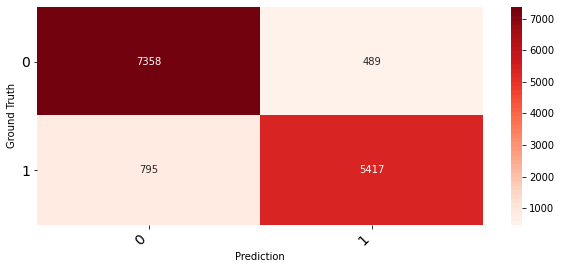

In [17]:
predicts = predict_model(device, model, test_dataloader)
# predicts = np.load(data_path/"saved_pred.npy")
preds = show_preds(predicts, test_labels)